In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
%matplotlib inline

In [8]:
from google.colab import files
uploaded = files.upload()

Saving preprocessed_multiple_class.csv to preprocessed_multiple_class.csv


In [10]:
import pandas as pd
df = pd.read_csv("preprocessed_multiple_class.csv")
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,attack type
0,-1.844530,0.003013,-0.077057,-0.214017,-0.604202,0.785226,0.088003,0.488782,-1.089147,-0.266907,...,-0.399339,0.442995,0.380217,0.086113,0.398695,-0.038791,-0.000418,-0.035242,-0.071810,Bot
1,-2.114291,-0.053045,0.379540,-0.046920,1.242315,0.119263,0.000331,-0.628133,-0.882525,2.033132,...,0.033110,-1.786123,0.818943,-0.538143,-0.264298,0.011855,-0.000585,0.031274,0.022991,Web Attack
2,-1.842625,0.002847,-0.075887,-0.213708,-0.604181,0.785390,0.087978,0.487524,-1.089749,-0.267633,...,-0.400734,0.442891,0.379991,0.086025,0.398904,-0.038814,-0.000419,-0.034028,-0.072332,Bot
3,-1.478224,-0.010469,0.011352,-0.011329,-0.400250,1.592338,0.161982,0.952709,-2.091688,-0.096761,...,-0.242185,-0.208548,0.288761,0.077288,0.315320,-0.026143,-0.000367,0.311215,-0.128024,Web Attack
4,-1.902913,0.026170,-0.273082,-0.080753,-0.567086,1.085976,0.120778,0.802664,-1.394595,-0.442245,...,-0.094592,0.409424,0.065545,0.266979,0.509591,-0.036566,-0.001091,0.010120,-0.101205,Port Scan


In [17]:
# Encode labels
le = LabelEncoder()
df['attack type'] = le.fit_transform(df['attack type'])

In [18]:
# Split data
X = df.drop('attack type', axis=1)
y = df['attack type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [19]:
# Build ANN
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=40,
    batch_size=64,
    verbose=1
)

Epoch 1/40
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7906 - loss: 0.6501 - val_accuracy: 0.9527 - val_loss: 0.1669
Epoch 2/40
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9340 - loss: 0.2010 - val_accuracy: 0.9512 - val_loss: 0.1444
Epoch 3/40
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9477 - loss: 0.1578 - val_accuracy: 0.9661 - val_loss: 0.1145
Epoch 4/40
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9570 - loss: 0.1374 - val_accuracy: 0.9691 - val_loss: 0.1063
Epoch 5/40
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9600 - loss: 0.1240 - val_accuracy: 0.9703 - val_loss: 0.0988
Epoch 6/40
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9642 - loss: 0.1152 - val_accuracy: 0.9719 - val_loss: 0.0944
Epoch 7/40
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9669 - loss: 0.1060 - val_accuracy: 0.9718 - val_loss: 0.0909
Epoch 8/40
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9671 - loss: 0.1064 - val_accuracy: 0.

In [22]:
# Evaluate
y_pred = np.argmax(model.predict(X_test), axis=1)

274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [23]:
print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


 Classification Report:
              precision    recall  f1-score   support

      BENIGN       0.99      0.91      0.95      1250
         Bot       0.98      1.00      0.99      1250
 Brute Force       0.99      0.98      0.98      1250
        DDoS       0.99      1.00      0.99      1250
         DoS       0.96      1.00      0.98      1250
   Port Scan       0.98      1.00      0.99      1250
  Web Attack       0.97      0.99      0.98      1250

    accuracy                           0.98      8750
   macro avg       0.98      0.98      0.98      8750
weighted avg       0.98      0.98      0.98      8750



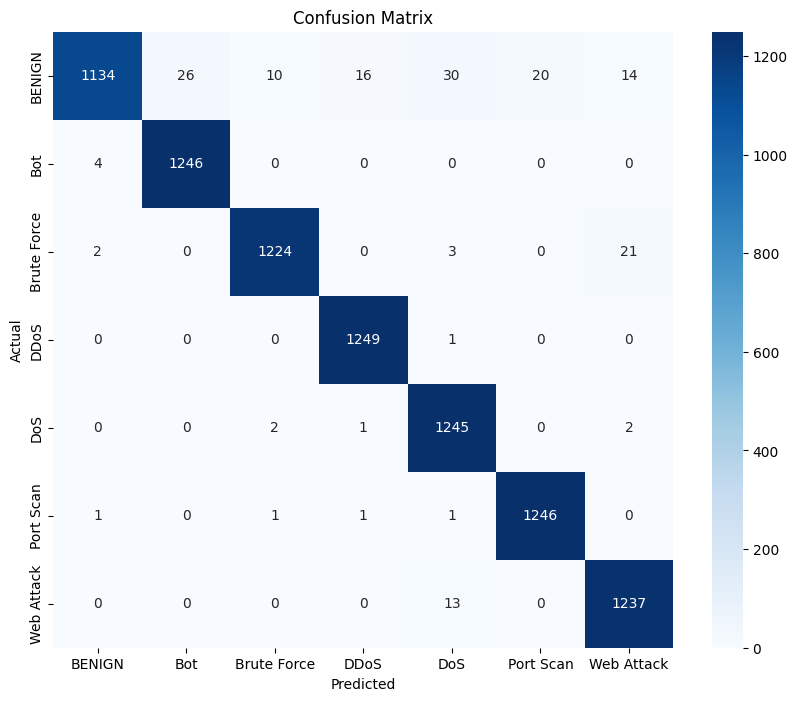

In [24]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()